# Predictin heart disease using machine learning

This notebook looks into using various Python-based machine learning and data scince libraris in an attempt to build a machine learning model capable of predicting whether or not a person has heart disease based on their medical attributes.

## 1. Problem Definition

In a statement,
>Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data

The original data came from the Cleavland data from the UCI Machine Learning Repository. <br>

https://archive.ics.uci.edu/dataset/45/heart+disease

## 3. Evaluation

> The model should reach 95% accuracy at predicting whether or not a patient has heart disease.

## 4. Features

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    - 0: Typical angina: chest pain related decrease blood supply to the heart
    - 1: Atypical angina: chest pain not related to heart
    - 2: Non-anginal pain: typically esophageal spasms (non heart related)
    - 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    - serum = LDL + HDL + .2 * triglycerides
    - above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    - '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    - 0: Nothing to note
    - 1: ST-T Wave abnormality
      - can range from mild symptoms to severe problems
      - signals non-normal heart beat
    - 2: Possible or definite left ventricular hypertrophy
      - Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    - 0: Upsloping: better heart rate with excercise (uncommon)
    - 1: Flatsloping: minimal change (typical healthy heart)
    - 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    - colored vessel means the doctor can see the blood passing through
    - the more blood movement the better (no clots)
13. thal - thalium stress result
    - 1,3: normal
    - 6: fixed defect: used to be defect but ok now
    "- 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

## Preparing the tools

In [1]:
# Regular EDA (Explorotory Data Analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# To display the plots to appear inside the notebook
%matplotlib inline 

# Models from Scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, RocCurveDisplay
from sklearn.metrics import precision_score, recall_score, f1_score, RocCurveDisplay
from sklearn.metrics import RocCurveDisplay

## Load Data

In [2]:
df = pd.read_csv("data/heart-disease.csv")
df.shape

(303, 14)

## Data Exploration (EDA)

The goal here is to find out more about the data. <br>

<span style="color: red">Need paraphrasing</span>

1. What questions are we trying to solve?
2. What kind of data do we have and how to treat different types?
3. What is missing from the data and how do we deal with it?
4. Where are the outliers and why should we care about it?
5. How can we add, change or remove features to get more out of the data?

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# How many patients have heart dieases and how many do not
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

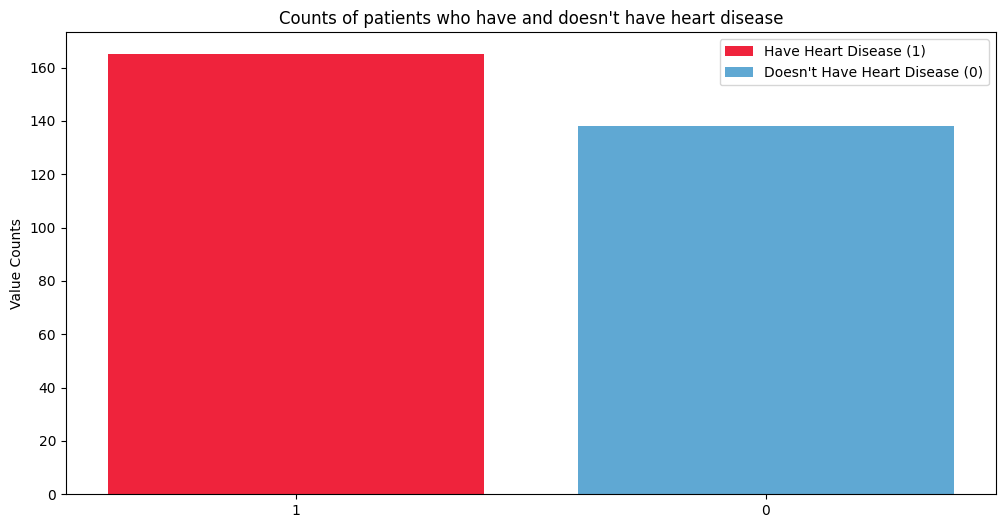

In [6]:
fig, ax = plt.subplots(figsize = (12, 6))

# df['target'].value_counts().plot(kind = "bar", color = ["orange", "blue"])

to_string = lambda x: str(x)

values = df["target"].unique()
cat_values = np.array([to_string(value) for value in values])
value_counts = df["target"].value_counts()
bar_labels = ["Have Heart Disease (1)", "Doesn't Have Heart Disease (0)"]
bar_colors = ["#ef233c", "#5fa8d3"]

ax.bar(cat_values, value_counts, label = bar_labels, color = bar_colors, )

ax.set_ylabel("Value Counts")
ax.set_title("Counts of patients who have and doesn't have heart disease")
ax.legend()

plt.show()



In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
# Check if there are any missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to Sex

In [10]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [11]:
print("""
The data has more male records than females records (approximatelty, the number of males is double the number of females)
""")


The data has more male records than females records (approximatelty, the number of males is double the number of females)



In [12]:
# Compare target column with sex column
ctab = pd.crosstab(df.target, df.sex)
ctab

sex,0,1
target,,
0,24,114
1,72,93


In [13]:
print(f"""
      Based on this data set, {ctab[0][1] / (ctab[0][1] + ctab[0][0]) * 100}% of females have heart disease.
    """)


      Based on this data set, 75.0% of females have heart disease.
    


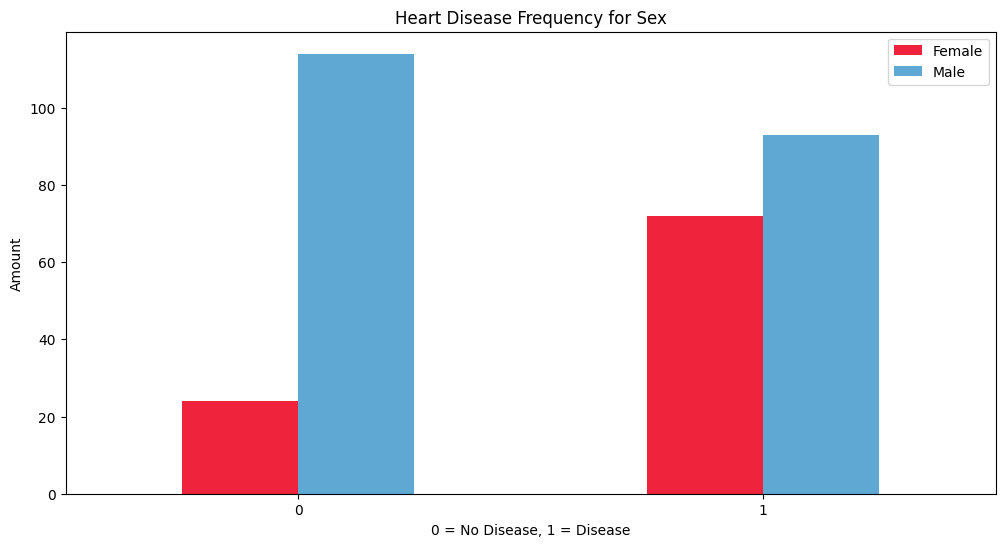

In [14]:
# Visualizing the crosstab
pd.crosstab(df.target, df.sex).plot(kind = "bar",
                                    figsize = (12, 6),
                                    color = bar_colors,
                                  )

plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation = 0);

In [15]:
print(f"""
  There are more males who have heart disease than females. However, when comparing the ratio of those who have heaer disease and those who who doesn't for each sex,
  the ratio of females is higher than males by {ctab[0][1] / (ctab[0][1] + ctab[0][0]) * 100 - ctab[1][1] / (ctab[1][1] + ctab[1][0]) * 100:.2f}%
""")


  There are more males who have heart disease than females. However, when comparing the ratio of those who have heaer disease and those who who doesn't for each sex,
  the ratio of females is higher than males by 30.07%



### Age vs. Max Heart Rate for Heart Disease

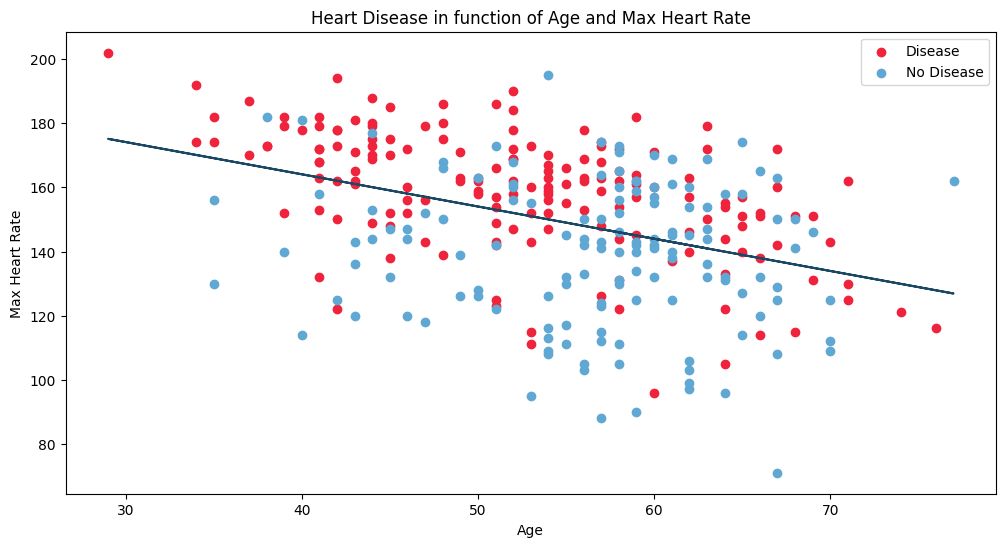

In [16]:
from scipy import stats


colors = ["#ef233c", "#4361ee", "#4c956c"]
colors = ["#62b6cb", "#bee9e8", "#5fa8d3", "#cae9ff", "#1b4965", "#ef233c"]

plt.figure(figsize = (12, 6))

# Scatter with positive records
plt.scatter(df.age[df.target == 1], df.thalach[df.target == 1],
            color = colors[5]
            )

# Scatter with negative records
plt.scatter(df.age[df.target == 0], df.thalach[df.target == 0],
            color = colors[2]
            )

# Adding some info to the plot
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

# Adding a seperation line
slope, intercept, rvalue, pvalue, stderr = stats.linregress(df.age, df.thalach)

# plt.plot(df.age, slope * df.age + intercept, linestyle = (0, (3, 10, 1, 10)), color = colors[2]);
plt.plot(df.age, slope * df.age + intercept, linestyle = "solid", color = colors[4]);



### Age Distribution

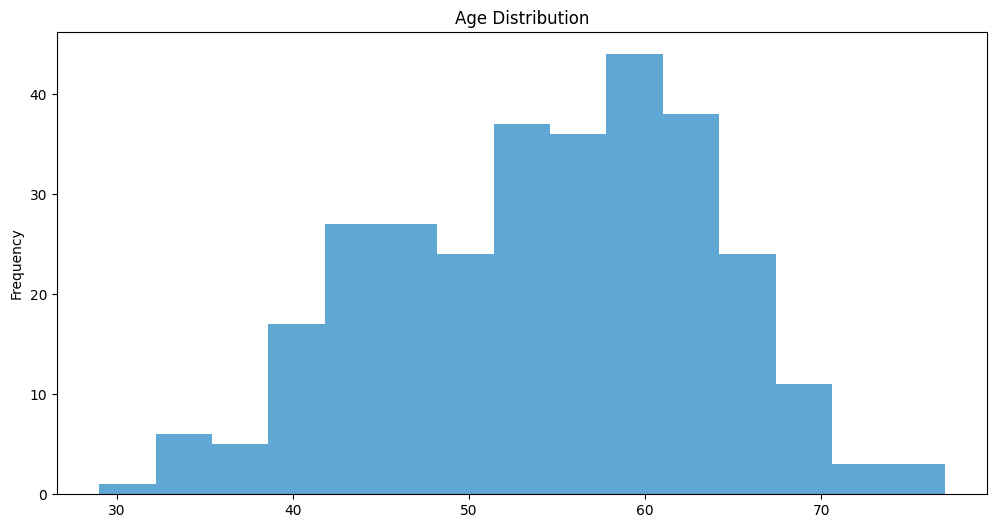

In [17]:
# Checking the distribtion of the age
df.age.plot.hist(figsize = (12, 6), color = colors[2], bins = 15);

plt.title("Age Distribution");

### Heart Disease Frequency per Chest Pain Type
- cp - chest pain type
    - 0: Typical angina: chest pain related decrease blood supply to the heart
    - 1: Atypical angina: chest pain not related to heart
    - 2: Non-anginal pain: typically esophageal spasms (non heart related)
    - 3: Asymptomatic: chest pain not showing signs of disease

In [18]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

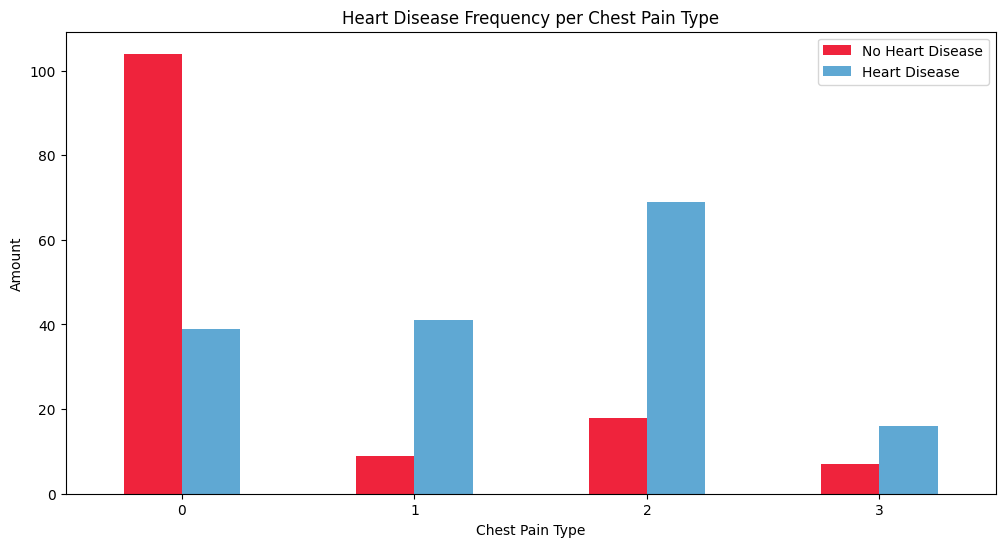

In [19]:
# Visualizing the crosstab
pd.crosstab(df.cp, df.target).plot(figsize = (12, 6),
                                    kind = "bar",
                                    color = [colors[5], colors[2]]
                                    )
# Add some info
plt.title("Heart Disease Frequency per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Heart Disease", "Heart Disease"])
plt.xticks(rotation = 0)

In [337]:
# Correlation Matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


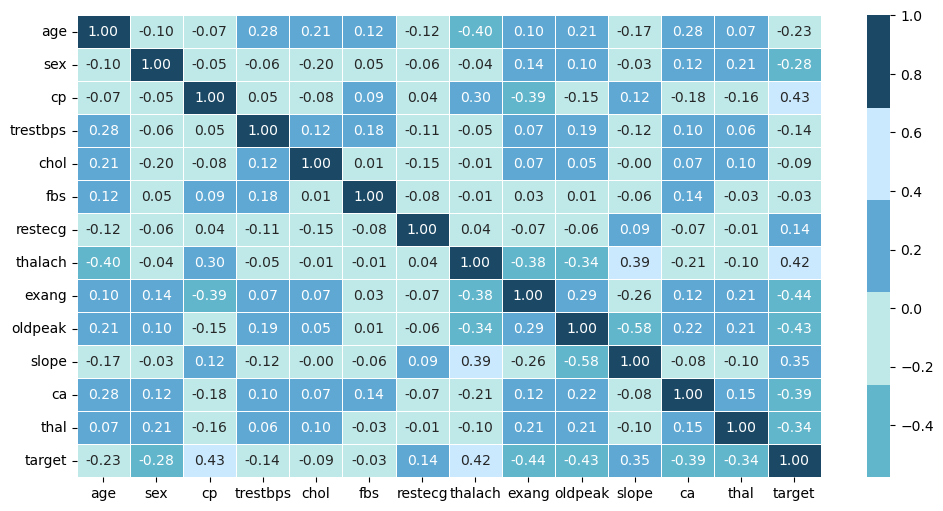

In [342]:
# Visualizing the correlation matrix

cmap_colors = colors[:-1]

corr_matrix = df.corr()
fig, ax = plt.subplots(figsize = (12, 6))

ax = sns.heatmap(corr_matrix,
                 annot = True,
                 linewidths = 0.5,
                 fmt = ".2f",
                 cmap = cmap_colors,
                 )

In [343]:
print("""
  According to the correlation matrix, as the chest pain type goes up, the target coulumn increases (higher chance that the person has heart disease)
""")


  According to the correlation matrix, as the chest pain type goes up, the target coulumn increases (higher chance that the person has heart disease)



## 5. Modelling

In [344]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [267]:
# Split the data into X and y
X = df.drop("target", axis = 1)

y = df["target"]

# X
# y

In [268]:
# Split the data into train and test sets
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True)

#len(X_train), len(y_train), len(X_test), len(y_test)


In [277]:
# Putting models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Creating a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
  """
  Fits and evaluates given machine learning models.
  models: a dictionary of different Scikit-Learn machine learning models
  X_train: training data (no labels)
  X_test: testing data (no labels)
  y_train: training labels
  y_test: test labels
  """
  # Set random seed
  np.random.seed(42)
  # Making a list to keep model scores
  models_scores = {}
  # Loop through the models
  for name, model in models.items():
    # Fit the model to the data
    model.fit(X_train, y_train)
    # Evaluate the model and add its score to models_scores
    models_scores[name] = model.score(X_test, y_test)

  return models_scores

In [278]:
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)

model_scores

/Users/zac/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## Model Comparison

In [279]:
model_compare = pd.DataFrame(model_scores, index = ["Accuracy"])

model_compare

,Logistic Regression,KNN,Random Forest
Accuracy,0.885246,0.688525,0.836066


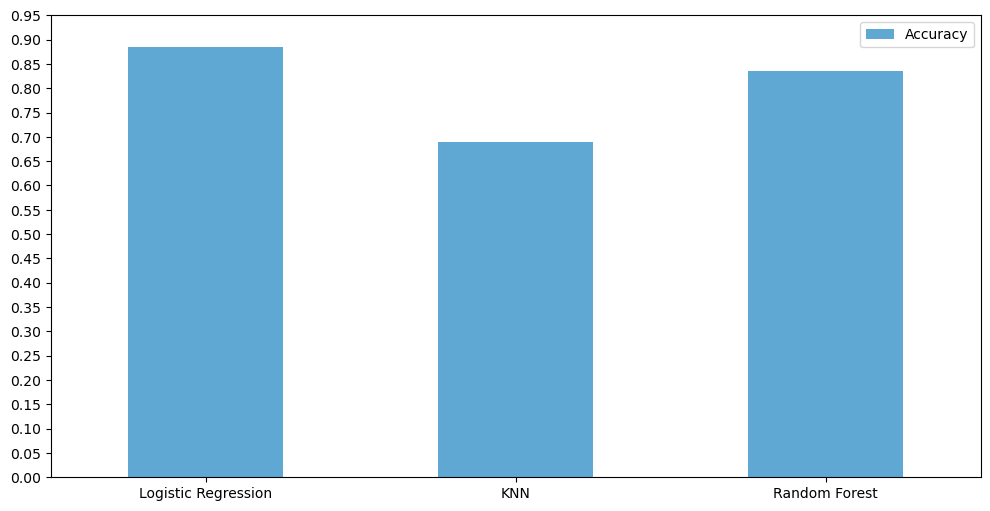

In [345]:
model_compare.T.plot.bar(figsize = (12, 6), color = colors[2])
plt.xticks(rotation = 0);
plt.yticks(np.arange(0, 1, 0.05));

## KNN Hyperparameter Tuning

In [281]:
# Tuning KNN Model
train_scores = []
test_scores = []

# Creating a list for different values of n_neighbors 
neighbors = [i for i in range(1, 21)]

# Create the KNN instance
knn = KNeighborsClassifier()

# Loop throguh different n_neighbors
for neighbor in neighbors:
  knn.set_params(n_neighbors = neighbor)

  # Fit the algorithm
  knn.fit(X_train, y_train)

  # Update the training scores list
  train_scores.append(knn.score(X_train, y_train))

  # Update the testing scores list
  test_scores.append(knn.score(X_test, y_test))



Maximum KNN score on the test data: 75.41%


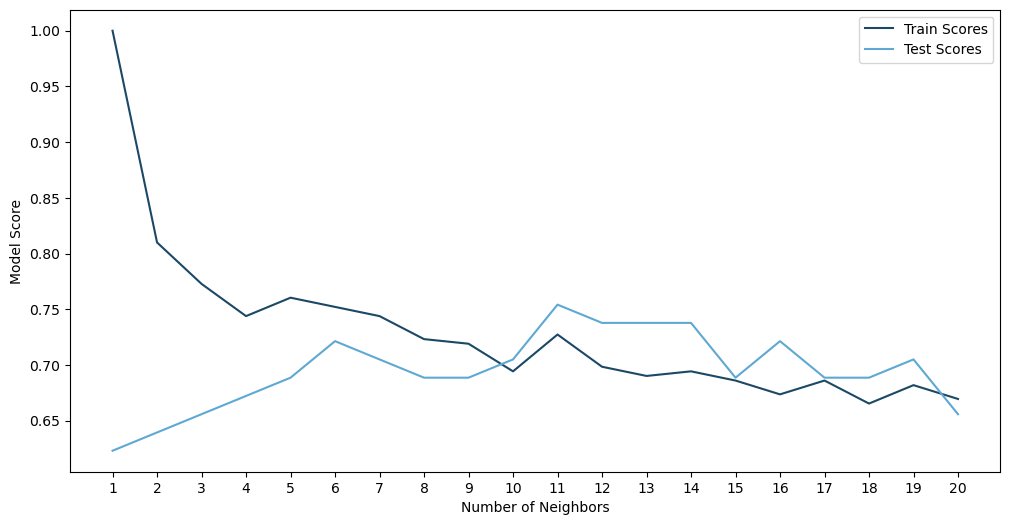

In [347]:
from matplotlib.pyplot import figure

figure(figsize = (12, 6))

plt.plot(neighbors, train_scores, label = "Train Scores", color = cmap_colors[4])
plt.plot(neighbors, test_scores, label = "Test Scores", color = colors[2])
plt.xlabel("Number of Neighbors")
plt.ylabel("Model Score")
plt.legend()
plt.xticks(np.arange(1, 21))

print(f"Maximum KNN score on the test data: {max(test_scores) * 100:.2f}%")


In [291]:
print("""
  According to the figure abouve, the best number of nearest neighbors is 11 with accuracy of 75.41%.
  Although the accuracy of the KNN model has improved by changing the n_neighbors hyperparameter. It still
  has lower accuracy than the logistic regression model.
""")


  According to the figure abouve, the best number of nearest neighbors is 11 with accuracy of 75.41%.
  Although the accuracy of the KNN model has improved by changing the n_neighbors hyperparameter. It still
  has lower accuracy than the logistic regression model.



## Hyperparameter tuning with RandomizedSearchCV

Using RandomizedSearchCV to tune `LogisticRegression()` and `RandomForestClassifier()`

### Logistic Regression Tuning

In [292]:
# Creating a hyperparameter grid for logistic regression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}



# Creating a hyperparameter grid for random forest classifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),}

In [293]:
# Tuning logistic regression

np.random.seed(42)

# Setting up random hyperparameter search for logistic regression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions = log_reg_grid,
                                cv = 5,
                                n_iter = 20,
                                verbose = True)
# Fitting random hyperparameter search model for logistic regression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [294]:
# Finding the best parameters
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [295]:
rs_log_reg_score = rs_log_reg.score(X_test, y_test)
rs_log_reg_score

0.8852459016393442

### Random Forest Classifier Tuning

In [296]:
# Setting up random seed
np.random.seed(42)

# Setting up random hyperparameter search for random forest classifer
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                                param_distributions = rf_grid,
                                cv = 5,
                                n_iter = 20,
                                verbose = True)
# Fitting random hyperparameter search model for random forest classifer
rs_rf.fit(X_train, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [297]:
# Finding the best parameters
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [298]:
rs_rf.score(X_test, y_test)

0.8688524590163934

In [299]:
print("""
  After tuning the models, it shows that the original logistic regression model still outperform the tuned models
  with RandomizedSearchCV.
""")


  After tuning the models, it shows that the original logistic regression model still outperform the tuned models
  with RandomizedSearchCV.



## Hyperparameter tuning with GridSearchCV

Since the logistic regression model provides the best results so far, GridSearchCV will be used in order to improve it.

In [300]:
# Creating a hyperparameter grid for logistic regression
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"],
                "intercept_scaling": np.arange(1, 10)}

# Setting up random hyperparameter search for logistic regression
gs_log_reg = GridSearchCV(LogisticRegression(),
                                param_grid = log_reg_grid,
                                cv = 10,
                                verbose = True)
# Fitting grid hyperparameter search model for logistic regression
gs_log_reg.fit(X_train, y_train)

Fitting 10 folds for each of 270 candidates, totalling 2700 fits


GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'intercept_scaling': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'solver': ['liblinear']},
             verbose=True)

In [301]:
# Finding the best hyperparameters
gs_log_reg.best_params_

{'C': 4.893900918477489, 'intercept_scaling': 3, 'solver': 'liblinear'}

In [302]:
# Evaluating the logistic regression model
gs_log_reg_score = gs_log_reg.score(X_test, y_test)
gs_log_reg_score

0.8524590163934426


  The best score was obtained by Original with 88.52459016393442% accuracy.



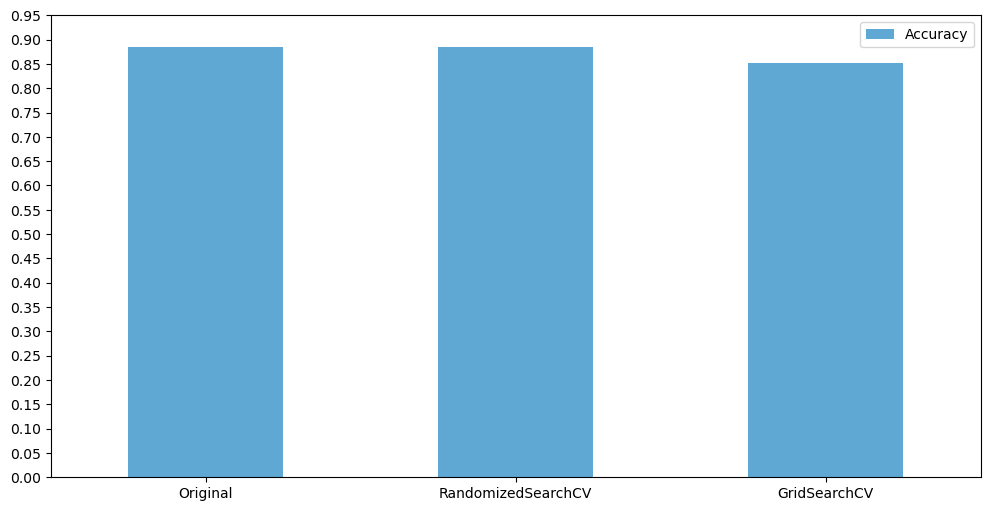

In [348]:
# checking the difference between the scores of different hyperparameter tuning for logistic regression
log_reg_scores = {
  "Original": model_scores["Logistic Regression"],
  "RandomizedSearchCV": rs_log_reg_score,
  "GridSearchCV":  gs_log_reg_score
}

log_reg_df = pd.DataFrame(log_reg_scores, index = ["Accuracy"])

log_reg_df.T.plot.bar(figsize = (12, 6), color = cmap_colors[2])
plt.xticks(rotation = 0);
plt.yticks(np.arange(0, 1, 0.05));

sorted_log_reg_scores = dict(sorted(log_reg_scores.items()))

max_score = max(log_reg_scores.values())
max_score_method = list(log_reg_scores.keys())[list(log_reg_scores.values()).index(max_score)]

print(f"""
  The best score was obtained by {max_score_method} with {max_score * 100}% accuracy.
""")


## Evaluating the tuned machine learning model (beyond accuracy)

In [306]:
# Making predictions with the tuned model
y_preds = gs_log_reg.predict(X_test)

In [307]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_preds)
roc_auc = metrics.auc(fpr, tpr)


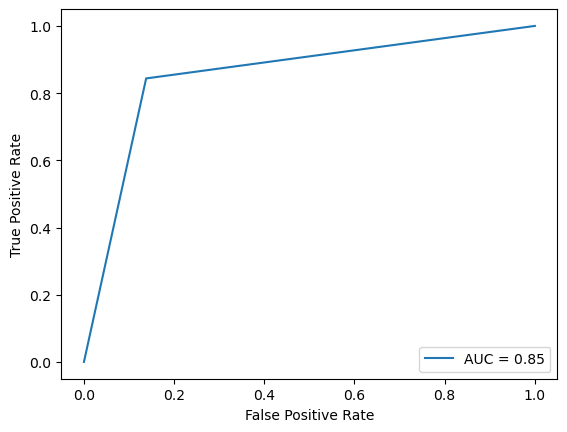

In [308]:
# Plotting the ROC curve and calculate the AUC metric
roc_curve = RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = roc_auc)
roc_curve.plot()
plt.show()

In [309]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 5 27]]


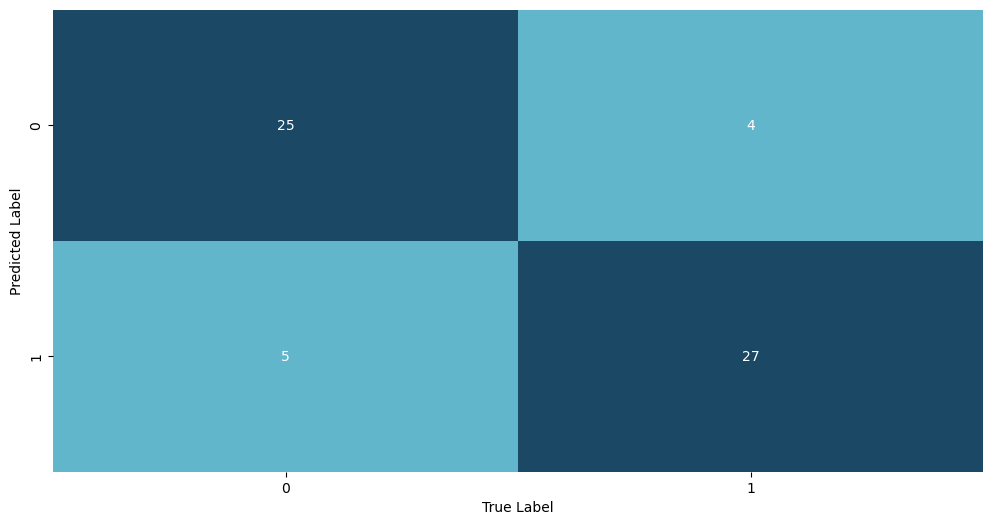

In [349]:
def plot_conf_mat(y_test, y_preds):
  """
  Plots a confusion matrix using Seaborn's heatmap()
  """

  fig, ax = plt.subplots(figsize = (12, 6))
  ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                   cmap = cmap_colors,
                   annot = True,
                   cbar = False)

  plt.xlabel("True Label")
  plt.ylabel("Predicted Label")

plot_conf_mat(y_test, y_preds)

In [350]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



## Calculating evaluation metrics using cross-validation

In [351]:
# Getting best hyperparameters
gs_log_reg.best_params_

{'C': 4.893900918477489, 'intercept_scaling': 3, 'solver': 'liblinear'}

In [352]:
# Creating a new classifier with the best hyperparameters
clf = LogisticRegression(C = 4.893900918477489,
                         intercept_scaling = 3,
                         solver = "liblinear",
                         )

In [353]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf, X, y, cv = 5, scoring = "accuracy")

cv_acc = np.mean(cv_acc)
cv_acc

0.8315300546448089

In [354]:
# Cross-validated precision
# Cross-validated accuracy
cv_precision = cross_val_score(clf, X, y, cv = 5, scoring = "precision")

cv_precision = np.mean(cv_precision)
cv_precision

0.8214092741066426

In [355]:
# Cross-validatedn recall
cv_recall = cross_val_score(clf, X, y, cv = 5, scoring = "recall")

cv_recall = np.mean(cv_recall)
cv_recall

0.8909090909090909

In [356]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf, X, y, cv = 5, scoring = "f1")

cv_f1 = np.mean(cv_f1)
cv_f1

0.8532195593974488

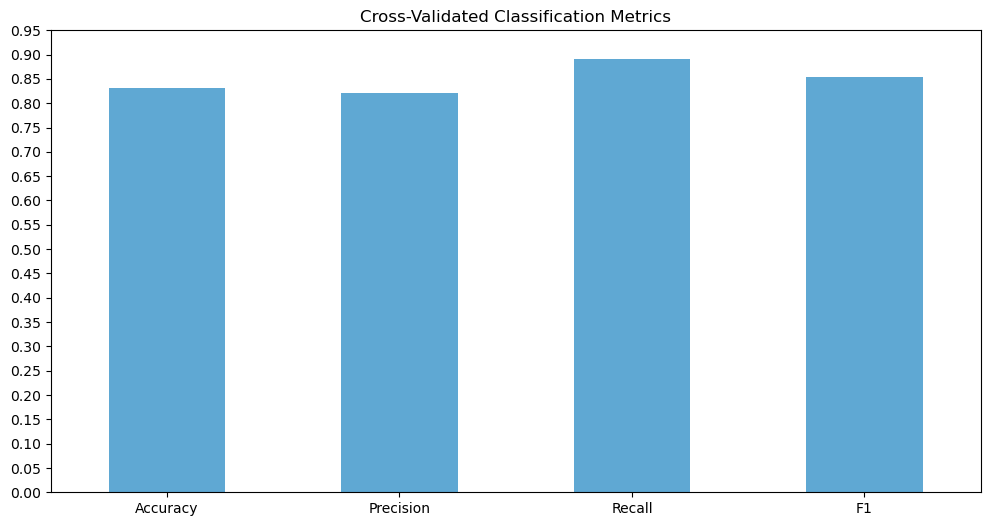

In [357]:
# Visualizing the cross-validated metrics
cv_metrics = pd.DataFrame({
  "Accuracy": cv_acc,
  "Precision": cv_precision,
  "Recall": cv_recall,
  "F1": cv_f1
}, index = [0])

cv_metrics.T.plot.bar(figsize = (12, 6),
                      title = "Cross-Validated Classification Metrics",
                      legend = False,
                      color = cmap_colors[2])
plt.xticks(rotation = 0)
plt.yticks(np.arange(0, 1, 0.05));

### Feature Importance

Finding the features that contribute the most to the outcome of the model and how they contribute.

In [321]:
# Fitting the instance of logistic regression 
clf.fit(X_train, y_train)

LogisticRegression(C=4.893900918477489, intercept_scaling=3, solver='liblinear')

In [322]:
# Checking the coefficients
clf.coef_

array([[-0.0052108 , -1.66581879,  0.84319734, -0.01638588, -0.00338907,
         0.25157149,  0.57055414,  0.02031662, -1.08722995, -0.64912679,
         0.73342026, -0.83138256, -0.96929803]])

In [323]:
# Matching the features coefficients to the columns
features_dict = dict(zip(df.columns, list(clf.coef_[0])))
features_dict

{'age': -0.00521079571603975,
 'sex': -1.6658187904954738,
 'cp': 0.8431973371562526,
 'trestbps': -0.016385883060841502,
 'chol': -0.0033890678750322432,
 'fbs': 0.25157149267398593,
 'restecg': 0.5705541432076101,
 'thalach': 0.02031662003735687,
 'exang': -1.087229945164341,
 'oldpeak': -0.6491267889330767,
 'slope': 0.7334202594952206,
 'ca': -0.8313825617253097,
 'thal': -0.9692980332296794}

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'age'),
  Text(1, 0, 'sex'),
  Text(2, 0, 'cp'),
  Text(3, 0, 'trestbps'),
  Text(4, 0, 'chol'),
  Text(5, 0, 'fbs'),
  Text(6, 0, 'restecg'),
  Text(7, 0, 'thalach'),
  Text(8, 0, 'exang'),
  Text(9, 0, 'oldpeak'),
  Text(10, 0, 'slope'),
  Text(11, 0, 'ca'),
  Text(12, 0, 'thal')])

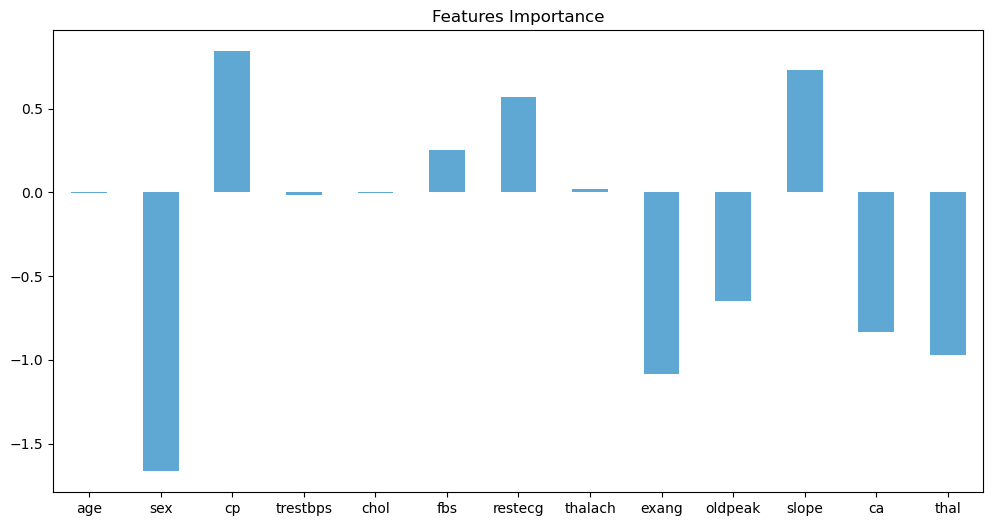

In [358]:
# Visualizing the feature importance
features_df = pd.DataFrame(features_dict, index = [0])

features_df.T.plot.bar(figsize = (12, 6),
                      title = "Features Importance",
                      legend = False,
                      color = cmap_colors[2])
plt.xticks(rotation = 0)


In [326]:
print("""
  According to the figure above, the features that have the most impact on the model prediction are cp, fbs, resecg
  and slope.
""")


  According to the figure above, the features that have the most impact on the model prediction are cp, fbs, resecg
  and slope.

